Tính feed forward cho tất cả các mẫu trong bộ dữ liệu.
Cách tính: 
https://aivietnam.ai/courses/aisummer2019/lessons/batch-gradient-descent/

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt('my_house_price_prediction.csv', delimiter=',')
m = data.shape[0]
X = data[:, 0]
y = data[:, 1:]
X_b = np.c_[np.ones((m, 1)), X]

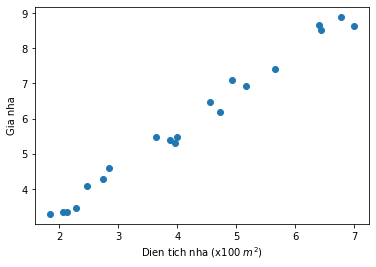

In [3]:
plt.scatter(X, y)
plt.xlabel('Dien tich nha (x100 $m^2$)')
plt.ylabel('Gia nha')
plt.show()

In [4]:
def batch_gradient_descent():
    n_iterations = 50
    learning_rate = 0.01
    
    # khoi tao gia tri tham so
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_iterations):
        output = np.dot(X_b, thetas)
        
        loss = (output - y)**2
        
        loss_grd = 2*(output - y)/m
        
        gradients = np.dot(X.T, loss_grd)
        
        # cap nhat tham so
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / m
        losses.append(mean_loss)
        
    return thetas_path, losses

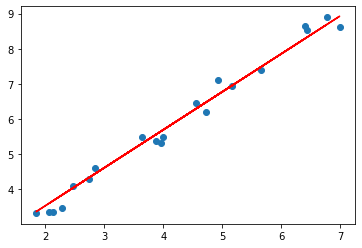

In [5]:
bgd_thetas, losses = batch_gradient_descent()
plt.scatter(X, y)
data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
plt.plot(X,data_y, color="r")
plt.show()